In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [2]:
df_tr = pd.read_csv("/content/Train (1).csv")
df_ts = pd.read_csv("/content/Test (2).csv")

# Introduction to problem statement
- The dataset contain the record of BigMart from year 2013 over 1559 product from 10 stores in different cities.
- There attribute define over each product and respective Store. 
- The aim is to build predictive model and predict values of sales product of particular outlet.
- Using various modeling tool like EDA, Feature we will try to understand the properties of products and outlets which play a key role in increasing sales.
- There may be missing values in dataset, as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# Description of Dataset:
Data We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

| Variable | Definition |
| --- | --- |
| Item_Identifier | Unique Product ID |
| Item_Weight | Weight of product |
| Item_Fat_Content | Whether the product is low fat or not |
| Item_visibility | The % of total display area of all products in a store allocated to the particular product |
| Item_Type| The category to which the product belongs. |
| Item_MRP | Maximum retail price(list price) of the product. |
| Outlet_Identifier | Unique store ID. |
| Outlet_Establishment_Year	| The year in which store was established. |
| Outlet_Size | The size of the store in terms of groud area covered. |
| Outlet_Location_Type | The type of city in which the store is located. |
| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket |
| Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted. |

In [3]:
df_tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_tr['Outlet_Size'][487]

'Small'

In [5]:
df_tr.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Observations:
- Total count of **Item_Weight** is 7060 which is less than the length of the training dataset, therefore it may contains some missing values.
- The average weight of all items is 12kg and the maximum weight of the item is 21 kg. So it is clear that the stores are not selling heavy weight items.
- The maximum price of the items is 266, so we can say that the stores does not selling costly items like TV, mobile phones, laptops etc.
- Most recent store was established in 2009 and the oldest store was established in 1985.
- Average sales of items is Rs 2181 and the maximum sale is Rs 13,086.

In [7]:
df_tr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df_tr.shape

(8523, 12)

In [9]:
print("Print the non-columns numerical columns :",list(df_tr.select_dtypes(include='object').columns))
print("Print the columns numerical columns :",list(df_tr.select_dtypes(include='number').columns))

Print the non-columns numerical columns : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Print the columns numerical columns : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [10]:
# Unique value in data frame column
print("Unique value in data frame column:")
print("Item_Identifier:",df_tr['Item_Identifier'].nunique())
print("Item_Fat_Content:",df_tr['Item_Fat_Content'].nunique())
print("Item_Type:",df_tr['Item_Type'].nunique())
print("Outlet_Size:",df_tr['Outlet_Size'].nunique())
print("Outlet_Location_Type:",df_tr['Outlet_Location_Type'].nunique())
print("Outlet_Type:",df_tr['Outlet_Type'].nunique())

Unique value in data frame column:
Item_Identifier: 1559
Item_Fat_Content: 5
Item_Type: 16
Outlet_Size: 3
Outlet_Location_Type: 3
Outlet_Type: 4


In [11]:

# Unique value distribution in data frame object column
print("Unique value distribution in data frame object column:")
print("Item_Identifier:",df_tr['Item_Identifier'].value_counts())
print("Item_Fat_Content:",df_tr['Item_Fat_Content'].value_counts())
print("Item_Type:",df_tr['Item_Type'].value_counts())
print("Outlet_Size:",df_tr['Outlet_Size'].value_counts())
print("Outlet_Location_Type:",df_tr['Outlet_Location_Type'].value_counts())
print("Outlet_Type:",df_tr['Outlet_Type'].value_counts())

Unique value distribution in data frame object column:
Item_Identifier: FDW13    10
FDG33    10
NCI54     9
FDU12     9
FDT07     9
         ..
FDT35     1
FDY43     1
FDO33     1
DRF48     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Fat_Content: Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type: Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size: Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [12]:
# Unique value in data frame of numerical column:
print("Unique value in data frame of numerical column:")
print("Item_Weight:",df_tr['Item_Weight'].nunique())
print("Item_Visibility:",df_tr['Item_Visibility'].nunique())
print("Item_MRP:",df_tr['Item_MRP'].nunique())
print("Outlet_Establishment_Year:",df_tr['Outlet_Establishment_Year'].nunique())
print("Item_Outlet_Sales:",df_tr['Item_Outlet_Sales'].nunique())


Unique value in data frame of numerical column:
Item_Weight: 415
Item_Visibility: 7880
Item_MRP: 5938
Outlet_Establishment_Year: 9
Item_Outlet_Sales: 3493


# Conclusion of Description of Dataset
- There are missing data in the few attribute, which needed to be treated.
  - one atrribute is numerical and another one is categorical.
- Other then Item identifier all other feature  has multiple attributes.
- The Time has only year attributes.

### Treating the Null Value
- Before Treating the missing value we need to understand how the missing value is spread across the dataframe respective columns:
  - like in numerical calumn whether the values is evenly spread or is there any relation between the statistical parameter like mean, mode, median.
  - For categorical, it is usefull the check whether spread of the data is well definable i.e. what is the most number of attibute in respective categorical column, that we can get using mode() function.
  - if both the condition is not satisfied then we need to replace the missing value by percentage wise distribution.

In [13]:
for i in range(len(df_tr.columns)):
  print("Number of null values in column {}:".format(i))
  print(df_tr.iloc[:, i].isnull().sum())

Number of null values in column 0:
0
Number of null values in column 1:
1463
Number of null values in column 2:
0
Number of null values in column 3:
0
Number of null values in column 4:
0
Number of null values in column 5:
0
Number of null values in column 6:
0
Number of null values in column 7:
0
Number of null values in column 8:
2410
Number of null values in column 9:
0
Number of null values in column 10:
0
Number of null values in column 11:
0


In [14]:
def missing_percent():
  miss_item_weight = (df_tr['Item_Weight'].isnull().sum()/len(df_tr))*100
  miss_Outlet_Size = (df_tr['Outlet_Size'].isnull().sum()/len(df_tr))*100

  print('% of missing values in Item_Weight: ' + str(miss_item_weight))
  print('% of missing values in Outlet_Size: ' +str(miss_Outlet_Size))

missing_percent()

% of missing values in Item_Weight: 17.165317376510618
% of missing values in Outlet_Size: 28.27642848762173


#### Filling Missing Value of Numerical column by Percentage wise distribution of Mean, Median, Mode.
 * Informative analysis of the missing value numerical columns.
  - Total count of Item_Weight is 7060 which is less than the length of the training dataset, therefore it may contains some missing values.
  - The average weight of all items is 12kg and the maximum weight of the item is 21 kg. So it is clear that the stores are not selling heavy weight items.
  - The maximum price of the items is 266, so we can say that the stores does not selling costly items like TV, mobile phones, laptops etc.
  - Most recent store was established in 2009 and the oldest store was established in 1985.
  - Average sales of items is Rs 2181 and the maximum sale is Rs 13,086.

- As we can see the mean, mode, median are distibution is nearly equal to each other.
- So its better to replace the missing value by percentage wise distribution.

In [15]:
df_tr[df_tr.columns[1]].isnull().value_counts()

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [16]:
print(df_tr[df_tr.columns[1]].mode())
print(df_tr[df_tr.columns[1]].median())
print(df_tr[df_tr.columns[1]].mean())

0    12.15
dtype: float64
12.6
12.857645184136183


In [17]:
# Total percentage of missing value in the columns:
len(df_tr[df_tr[df_tr.columns[1]].isnull()==True]['Item_Weight'])/len(df_ts)

0.25752508361204013

In [18]:
# treat Nan value in Item_Weight be Percentage wise distribution using MEAN
index = df_tr[df_tr[df_tr.columns[1]].isnull()==True]['Item_Weight'].sample(round(df_tr[df_tr.columns[1]].isnull().sum()/3), axis=0).index
for i in range(len(list(index))):
  df_tr.at[index[i], 'Item_Weight'] = df_tr['Item_Weight'].mean()#df_tr['Item_Weight'][i].fillna(value = df_tr[df_tr.columns[1]].mean())

In [19]:
# treat Nan value in Item_Weight be Percentage wise distribution using MODE
index = df_tr[df_tr[df_tr.columns[1]].isnull()==True]['Item_Weight'].sample(round(df_tr[df_tr.columns[1]].isnull().sum()/2), axis=0).index
for i in range(len(list(index))):
  df_tr.at[index[i], 'Item_Weight'] = df_tr['Item_Weight'].mode()

In [20]:
# treat Nan value in Item_Weight be Percentage wise distribution using 
index = df_tr[df_tr[df_tr.columns[1]].isnull()==True]['Item_Weight'].index
for i in range(len(list(index))):
  df_tr.at[index[i], 'Item_Weight'] = df_tr['Item_Weight'].median()

In [21]:
print(df_tr[df_tr.columns[1]].mode())
print(df_tr[df_tr.columns[1]].median())
print(df_tr[df_tr.columns[1]].mean())

0    12.15
dtype: float64
12.6
12.802405942726946


### Filling missing value by Precentage wise distribution of Categorical Column Outlet_Size
- For categorical missing value, we cannot treat by same method as the above missing value we treated for numerical value, 
- We have to find that how the attribute of respective feature are distributed.
- It all the attibute are spread randomly, then we have to replace the missing value by percentage wise distribution.

In [22]:
df_tr[df_tr.columns[8]].isnull().sum()

2410

In [23]:
print(df_tr[df_tr.columns[8]].mode())
print(df_tr[df_tr.columns[8]].value_counts())

0    Medium
dtype: object
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [24]:
known_tag = len(df_tr) - df_tr[df_tr.columns[8]].isnull().sum()
print("Percentage wise distribution for Medium mode:",len(df_tr[df_tr[df_tr.columns[8]]=='Medium'])/known_tag*100)
print("Percentage wise distribution for Small mode:",len(df_tr[df_tr[df_tr.columns[8]]=='Small'])/known_tag*100)
print("Percentage wise distribution for High mode:",len(df_tr[df_tr[df_tr.columns[8]]=='High'])/known_tag*100)

Percentage wise distribution for Medium mode: 45.68951415017177
Percentage wise distribution for Small mode: 39.06428921969573
Percentage wise distribution for High mode: 15.246196630132506


In [25]:
print((2410/100)*len(df_tr[df_tr[df_tr.columns[8]]=='Medium'])/known_tag*100)#/100)
print((2410/100)*len(df_tr[df_tr[df_tr.columns[8]]=='Small'])/known_tag*100)#/100)
print((2410/100)*len(df_tr[df_tr[df_tr.columns[8]]=='High'])/known_tag*100)#/100)

1101.1172910191397
941.4493701946672
367.43333878619336


In [26]:
index1 = df_tr[df_tr[df_tr.columns[8]].isnull()==True]['Outlet_Size'].sample(round(2410*len(df_tr[df_tr[df_tr.columns[8]]=='Medium'])/known_tag*100/(100)), axis=0).index
for i in range(len(list(index1))):
  df_tr.at[index1[i], 'Outlet_Size'] = df_tr['Outlet_Size'].mode()[0]

In [27]:
index2 = df_tr[df_tr[df_tr.columns[8]].isnull()==True]['Outlet_Size'].sample(round(2410*len(df_tr[df_tr[df_tr.columns[8]]=='Small'])/known_tag*100/(100)), axis=0).index
for i in range(len(list(index2))):
  df_tr.at[index2[i], 'Outlet_Size'] = 'Small'

In [28]:
#for column in df.Outlet_Size:
df_tr['Outlet_Size'].fillna('High', inplace=True)

In [29]:
print("Percentage wise distribution for Medium mode:",len(df_tr[df_tr[df_tr.columns[8]]=='Medium'])/len(df_tr)*100)
print("Percentage wise distribution for Small mode:",len(df_tr[df_tr[df_tr.columns[8]]=='Small'])/len(df_tr)*100)
print("Percentage wise distribution for High mode:",len(df_tr[df_tr[df_tr.columns[8]]=='High'])/len(df_tr)*100)

Percentage wise distribution for Medium mode: 45.68813797958465
Percentage wise distribution for Small mode: 39.05901677812977
Percentage wise distribution for High mode: 15.25284524228558


In [30]:
for i in range(len(df_tr.columns)):
  print("Number of null values in column {}:".format(i))
  print(df_tr.iloc[:, i].isnull().sum())

Number of null values in column 0:
0
Number of null values in column 1:
0
Number of null values in column 2:
0
Number of null values in column 3:
0
Number of null values in column 4:
0
Number of null values in column 5:
0
Number of null values in column 6:
0
Number of null values in column 7:
0
Number of null values in column 8:
0
Number of null values in column 9:
0
Number of null values in column 10:
0
Number of null values in column 11:
0


In [31]:
print(df_tr[df_tr.columns[8]].mode())
print(df_tr[df_tr.columns[8]].value_counts())

0    Medium
dtype: object
Medium    3894
Small     3329
High      1300
Name: Outlet_Size, dtype: int64


### Now Null value of Test dataset

#### Same above we handle the missing value of the numerical value and categorical value, we will use the same techniques of respeative type of feature value.

#### Numerical value

In [32]:
# treat Nan value in Item_Weight be Percentage wise distribution using MEAN
index_1 = df_ts[df_ts[df_ts.columns[1]].isnull()==True]['Item_Weight'].sample(round(df_ts[df_ts.columns[1]].isnull().sum()/3), axis=0).index
for i in range(len(list(index_1))):
  df_ts.at[index_1[i], 'Item_Weight'] = df_ts['Item_Weight'].mean()#df_tr['Item_Weight'][i].fillna(value = df_tr[df_tr.columns[1]].mean())

In [33]:
# treat Nan value in Item_Weight be Percentage wise distribution using MODE
index_2 = df_ts[df_ts[df_ts.columns[1]].isnull()==True]['Item_Weight'].sample(round(df_ts[df_ts.columns[1]].isnull().sum()/2), axis=0).index
for i in range(len(list(index_2))):
  df_ts.at[index_2[i], 'Item_Weight'] = df_ts['Item_Weight'].mode()


In [34]:
# treat Nan value in Item_Weight be Percentage wise distribution using 
index_3 = df_ts[df_ts[df_ts.columns[1]].isnull()==True]['Item_Weight'].index
for i in range(len(list(index_3))):
  df_ts.at[index_3[i], 'Item_Weight'] = df_ts['Item_Weight'].median()

#### Categorical value

In [35]:
print(df_ts[df_ts.columns[8]].mode())
print(df_ts[df_ts.columns[8]].value_counts())

0    Medium
dtype: object
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [36]:
known_tag_1 = len(df_ts) - df_ts[df_ts.columns[8]].isnull().sum()
print("Percentage wise distribution for Medium mode:",len(df_ts[df_ts[df_ts.columns[8]]=='Medium'])/known_tag_1*100)
print("Percentage wise distribution for Small mode:",len(df_ts[df_ts[df_ts.columns[8]]=='Small'])/known_tag_1*100)
print("Percentage wise distribution for High mode:",len(df_ts[df_ts[df_ts.columns[8]]=='High'])/known_tag_1*100)

Percentage wise distribution for Medium mode: 45.69325153374233
Percentage wise distribution for Small mode: 39.06748466257668
Percentage wise distribution for High mode: 15.23926380368098


In [37]:
index4 = df_ts[df_ts[df_ts.columns[8]].isnull()==True]['Outlet_Size'].sample(round(2410*len(df_ts[df_ts[df_ts.columns[8]]=='Medium'])/known_tag*100/(100)), axis=0).index
for i in range(len(list(index4))):
  df_ts.at[index4[i], 'Outlet_Size'] = df_ts['Outlet_Size'].mode()[0]

In [38]:
index5 = df_ts[df_ts[df_ts.columns[8]].isnull()==True]['Outlet_Size'].sample(round(2410*len(df_ts[df_ts[df_ts.columns[8]]=='Small'])/known_tag*100/(100)), axis=0).index
for i in range(len(list(index5))):
  df_ts.at[index5[i], 'Outlet_Size'] = 'Small'

In [39]:
#for column in df.Outlet_Size:
df_ts['Outlet_Size'].fillna('High', inplace=True)

In [40]:
print("Percentage wise distribution for Medium mode:",len(df_ts[df_ts[df_ts.columns[8]]=='Medium'])/len(df_ts)*100)
print("Percentage wise distribution for Small mode:",len(df_ts[df_ts[df_ts.columns[8]]=='Small'])/len(df_ts)*100)
print("Percentage wise distribution for High mode:",len(df_ts[df_ts[df_ts.columns[8]]=='High'])/len(df_ts)*100)

Percentage wise distribution for Medium mode: 45.696180249955994
Percentage wise distribution for Small mode: 39.077627178313676
Percentage wise distribution for High mode: 15.22619257173033


In [41]:
for i in range(len(df_ts.columns)):
  print("Number of null values in column {}:".format(i))
  print(df_ts.iloc[:, i].isnull().sum())

Number of null values in column 0:
0
Number of null values in column 1:
0
Number of null values in column 2:
0
Number of null values in column 3:
0
Number of null values in column 4:
0
Number of null values in column 5:
0
Number of null values in column 6:
0
Number of null values in column 7:
0
Number of null values in column 8:
0
Number of null values in column 9:
0
Number of null values in column 10:
0


## Exploaratory Data Analysis

In [42]:
df_ts.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [43]:
print("Print the numerical column in the dataset:",df_tr.select_dtypes(include=np.number).columns)
print("Print the categorical column in the dataset:",df_tr.select_dtypes(include=object).columns)

Print the numerical column in the dataset: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')
Print the categorical column in the dataset: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


**Numerical columns:**
- Item_Weight
- Item_Visibility 
- Item_MRP
- Outlet_Establishment_Year
- Item_Outlet_Sales

***Categorical Features***
- Item_Identifier
- Item_Fat_Content(Ordinal Feature)
- Item_Type
- Outlet_Itemtifier
- Outlet_Establishment_Year
- Outlet_Size(Ordinal Feature)
- Outlet__Location_Type(Ordinal Feature)
- Ootlet_Type(Ordinal Feature)

***Observation***
- There are 4 float type variables, 1 integer type and 7 object type.
- We are considering Item_Establishment_Year as a categorical feature because it contains some fixed value but not converting its data type now will consider later.
- Item_Fat_Content, Outlet_Size, Outelet_Location_Type and Outlet_Type are ordinal features because these values can be arranged in some order.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df_tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
df_tr.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

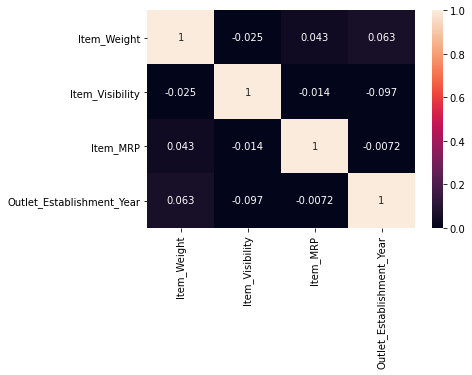

In [47]:
df_ts_ht_map = df_ts.corr()

sns.heatmap(df_ts_ht_map, vmin=0, vmax=1, annot=True)

### Plotting Numerical Feature

In [48]:
numerical = df_tr.select_dtypes(include=np.number).columns

In [49]:
def UVA_numeric(data, var_group, layout = None):
  '''
  data {dataframe}: the bulk data
  var_group {list}: list of variable to analyse
  layout{tuple}   : layout of visualisation (rows x columns)
  '''

  if layout == None:
    layout = (1,len(var_group))

  plt.figure(figsize = (layout[1]*10, layout[0]*10))


  for j,i in enumerate(var_group):
    min = data[i].min()
    max = data[i].max()
    range = data[i].max() - data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    std_dev = data[i].std()
    skew = data[i].skew()
    kurtosis = data[i].kurtosis()

    points = mean-std_dev, mean+std_dev

    #plotting of numeric features with all information.
    plt.subplot(layout[0],layout[1],j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'red', label = 'std_dev')
    sns.scatterplot([min,max], [0,0], color ='red', label = 'min/max')
    sns.scatterplot([mean], [0], color = 'blue', label = 'mean')
    sns.scatterplot([median], [0], color = 'green', label = 'median')
    plt.xlabel('{}'.format(i), fontsize = 20, fontweight = 'bold')
    plt.ylabel('Density', fontsize = 16, fontweight = 'bold')
    plt.title('std_dev = {}; kurtosis = {};\n skew = {}; range = {};\n mean = {}; median = {}'.format
                                                                                              ((round(points[0],2), round(points[1],2)),
                                                                                               round(kurtosis,2), round(skew,2),
                                                                                               (round(min,2), round(max,2), round(range,2)),
                                                                                               round(mean,2),
                                                                                               round(median,2)))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

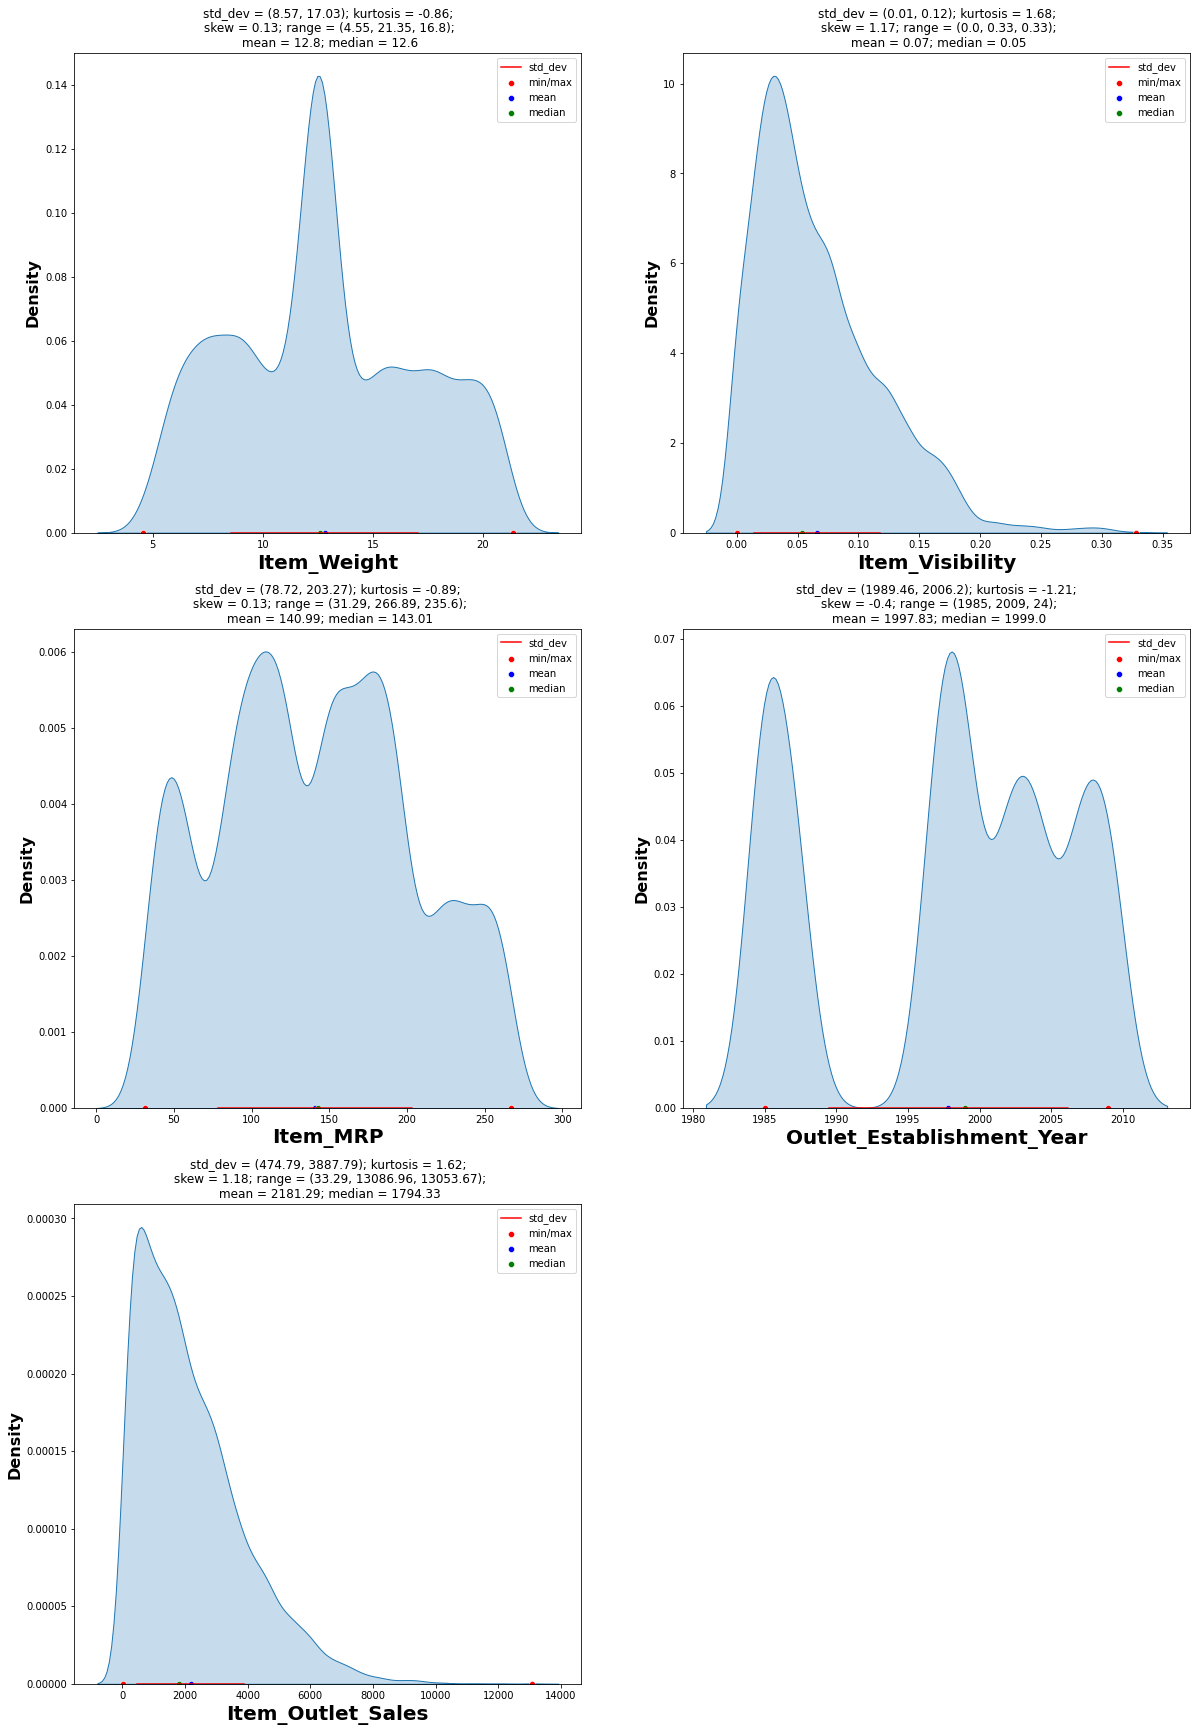

In [50]:
UVA_numeric(df_tr, numerical, (3,2))

**Observation:**
- The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12.
- There are some items that are not visible at all and the maximum visibility of the item is 33%.
- The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89.
-Most of the stores are established in year from 1985-1990 and 1995 to 2000.
- From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period.
- Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000.

### Plotting the Categorical Feature

In [51]:
def UVA_Categorical(data, cat):
  plt.figure(figsize = (10,6))
  sns.countplot(cat, data = data)
  plt.xlabel(cat,fontsize = 14, fontweight = 'bold')
  plt.ylabel('Count',fontsize = 14, fontweight = 'bold')
  plt.title('Value counts: \n{}'.format(df_tr[cat].value_counts(normalize = True)))

  # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


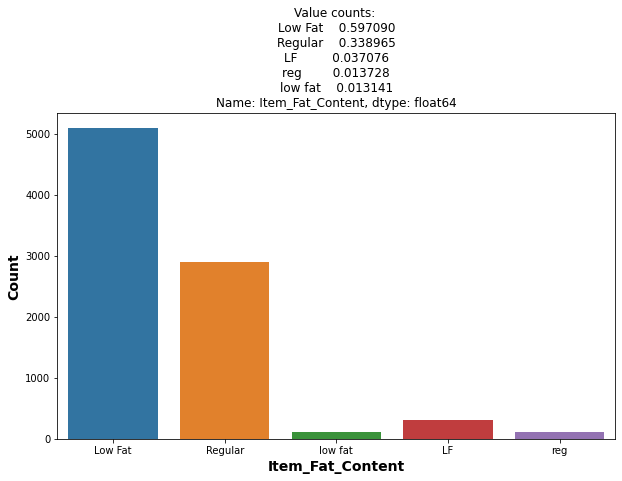

In [52]:
UVA_Categorical(df_tr,'Item_Fat_Content')

Observation : 
- Around 59% of the total items contains low fat while remaining contains regular fat.

- Low Fat, low fat & LF are all the same as Low Fat, so we can rename all other attributes the same as the Low Fat

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


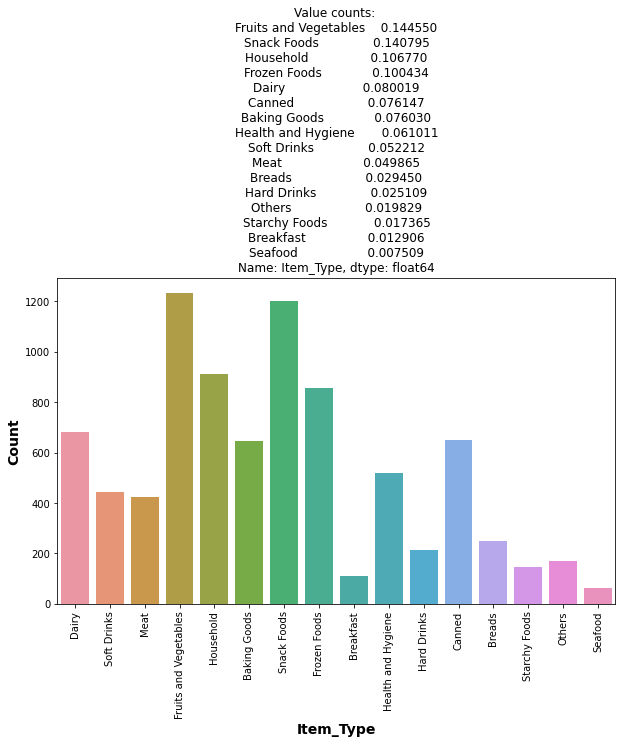

In [53]:
UVA_Categorical(df_tr, 'Item_Type')

**Observation :**
- Most number of product type are in demand to touch near **1200 Count** are **Fruits and Vegetables** & Snacks Foods.
- Seafood and Breakfast are less Count in Supermaket.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


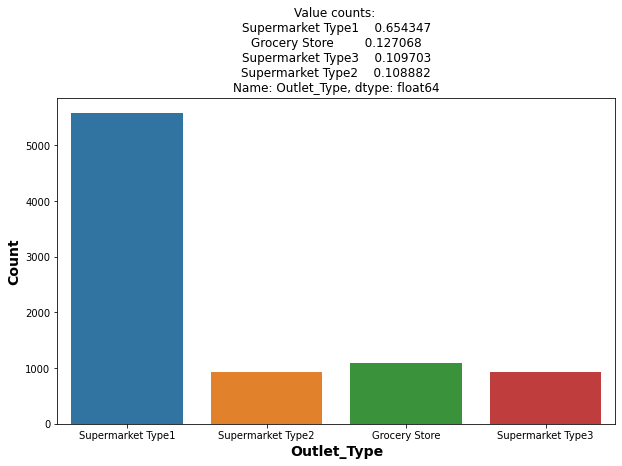

In [54]:
UVA_Categorical(df_tr, 'Outlet_Type')

In [55]:
df_tf_1 = df_tr.loc[(df_tr['Item_Type'] == 'Fruits and Vegetables') | (df_tr['Item_Type'] == 'Frozen Foods') | (df_tr['Item_Type'] == 'Dairy') | (df_tr['Item_Type'] == 'Household')]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


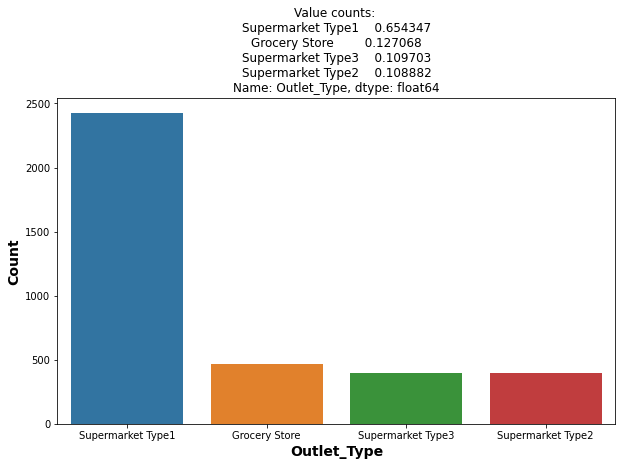

In [56]:
UVA_Categorical(df_tf_1,'Outlet_Type')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


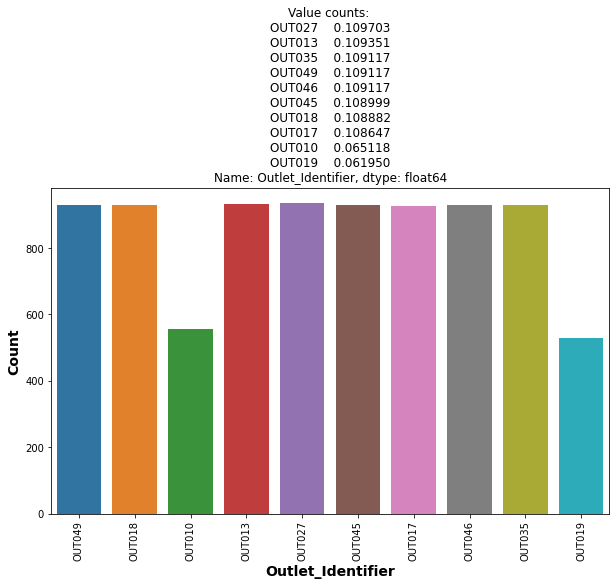

In [57]:
UVA_Categorical(df_tr, 'Outlet_Identifier')

**Observation:**
- There are total 10 stores.
- All the stores are selling almost same number of items except the OUT010 and OUT019 stores

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


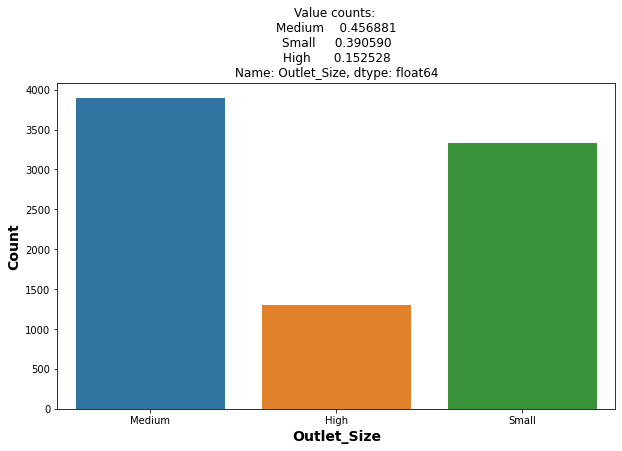

In [58]:
UVA_Categorical(df_tr,'Outlet_Size')

**Observation:**
- 45% of the total number of items are sell from medium size store while only 15% items are sell from store which are very big.

**New Hypothesis:**
- Are the stores with medium size have high sale than others.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


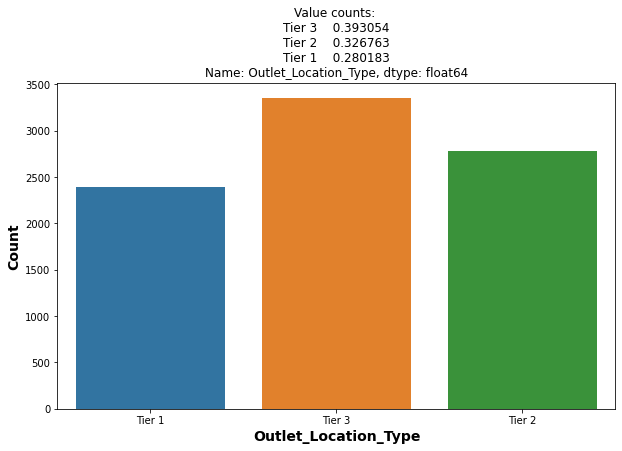

In [59]:
UVA_Categorical(df_tr, 'Outlet_Location_Type')

**Observation:**
- 39% of the items sells from the stores laocated in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities.

**New Hypothesis**:
- Are the stores located in Tier 3 cities have more sale than other.


### Summary of Uniariate Analysis
- **Numerical**
  - The weight of the items lies in the range of 4 - 22 while the average, mode and median weight of the items are around 12. Which show that buyer are of same financial concious or financial category 
  - There are some items that are not visible at all and the maximum visibility of the item is 33%. Most missing value are from only two category.
  - The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89, and even wieght outlet this both has some thing positive relation with each other. So their is more space for pregress we could increase product weight of that range we could increase more sale
  - Most of the stores are established in year from 1985-1990 and 1995 to 2000.
  - Even the search which supermarket top has 5 product sale, it was specific one and same supermarket has highest sale compare to other supermarket or store.

- **Categorical**
  - 64% of product which were sale was of only category *Low Fat*.
  - Highest percent of sale was from *fruits & vegetables and snacks and food* that too 14%.
  - Low market for *Breakfast and seafood* product.
  - All the stores are selling almost same number of items except the *OUT010 and OUT019* stores.
  - Highes income of sale was from medium size store, while 15% of sale was from big store
  - 39% of product sell share was from store located in 3 Tire cities, while 32%, 28% was from store located from Tire 2 and Tire 1 cities resp.

- Missing:
  - Since missing value in only few feature, but in large size we can't just drop it, we have to treat it. We have treated it by replace them percentage wise.

### Bivarent Analysis Observation:
- Are the item less visible has more sales.
- Check which store are recently open, compare its sale share is with other store also.
- Compare the item *Low Fat* with other *regular fat*, whether they have more sale.
- Are the store with medium size have high sale than other.
- Are the stores located in Tier 3 cities have more sale than other.
- Are the Supermarket Type 1 type of stores have more sales than other type of stores.
- Do the missing values of Item weight have some relation with sales of the items or any other feature.
- Do the missing values of Outlet size have some relation with any other feature.

#### Bivariate Analysis

**Bivariate Analysis: Numerical-Numerical**:
- Observation:
  - Are the item less visible has more sales.
  - Whether the item weight affect the sales.
  - Item with more MRP has more Outlet_Sales.

In [60]:
numerical = df_tr.select_dtypes(include=np.number)
numerical.dtypes.index

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

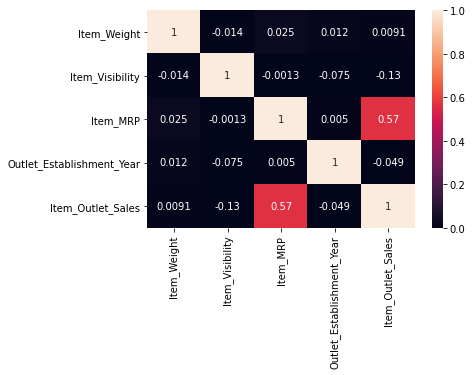

In [61]:
sns.heatmap(numerical.corr(method='pearson'), vmin=0, vmax=1, annot=True)

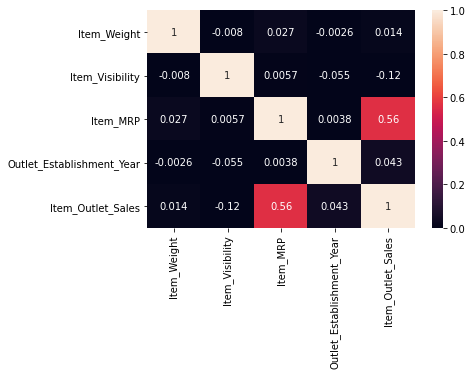

In [62]:
sns.heatmap(numerical.corr(method='spearman'), vmin=0, vmax=1, annot=True)

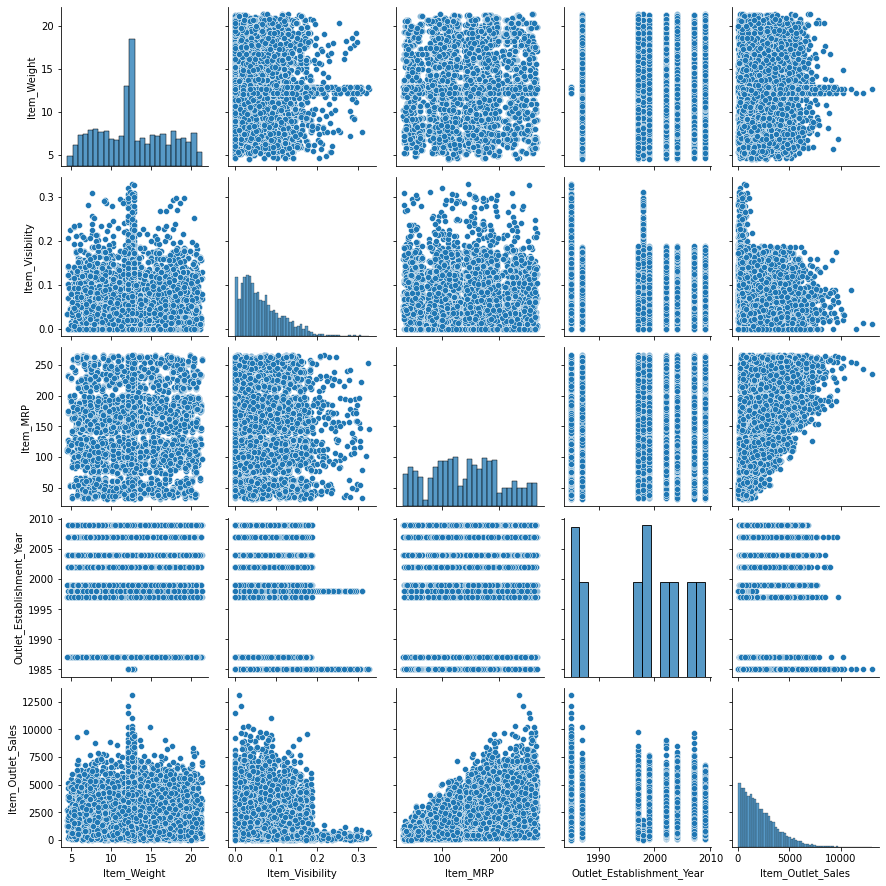

In [63]:
sns.pairplot(numerical)

#### Conclusion:
- **Market price** has some what relation with **Outlet Sell**.
- **Item_Outlet_Sales** has negative relative, so increasing the **item_visibility** will decrease the  Outlet Sales.
- **Item_Weight** and **Item_MRP** has some what positie relation.
- **Item_Weight** and **Outlet_Establishment** has no relation with Item_Out_Sales.

### Bivariate Analysis: Categorical.
In this we are going to analyze our data with one categorical feature and a target variable(numerical) and also perform some hypothesis testing falling in this section.

#### Hypothesis falling under this section.
- Are the store with medium size have high sale than other.
- Are the stores located in Tier 3 cities have more sale than other.
- Are the Supermarket Type 1 type of stores have more sales than other type of stores.
- Do the missing values of Item weight have some relation with sales of the items or any other feature.
- Do the missing values of Outlet size have some relation with any other feature.

In [64]:
numerical = df_tr.select_dtypes(include=object)
numerical.dtypes.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [65]:
def Bivariate_cont_cat(data, cont, cat, p_value, f_value, sign_level):

  # Checking hypothesis
  if p_value < sign_level and f_value > 1:
    sign = True
  else :
    sign = False

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  

  # Visualization
  plt.figure(figsize = (20,6),dpi = 120)
  

  # barplot
  plt.subplot(1,3,1)
  sns.barplot(x = cat, y = cont, data = data, hue = cat)
  plt.title('anova-test P value = {} \n anova_test F value = {} \n Significant difference = {} \n{}'.format(p_value, f_value, sign, table))
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)

  # Boxplot for checking Outliers
  plt.subplot(1,3,3)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot',fontsize = 14, fontweight = 'bold')
  
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)


##### Are the store with medium size have high sale than other.

In [66]:
from scipy import stats

In [67]:
df_anova = df_tr[['Item_Outlet_Sales', 'Item_Fat_Content']]
grouped_anova = df_anova.groupby('Item_Fat_Content')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Low Fat')['Item_Outlet_Sales'], 
                                  grouped_anova.get_group('low fat')['Item_Outlet_Sales'],
                                  grouped_anova.get_group('LF')['Item_Outlet_Sales'],
                                  grouped_anova.get_group('reg')['Item_Outlet_Sales'])
print(p_value, f_value)

0.4619169522909262 0.858401089471549


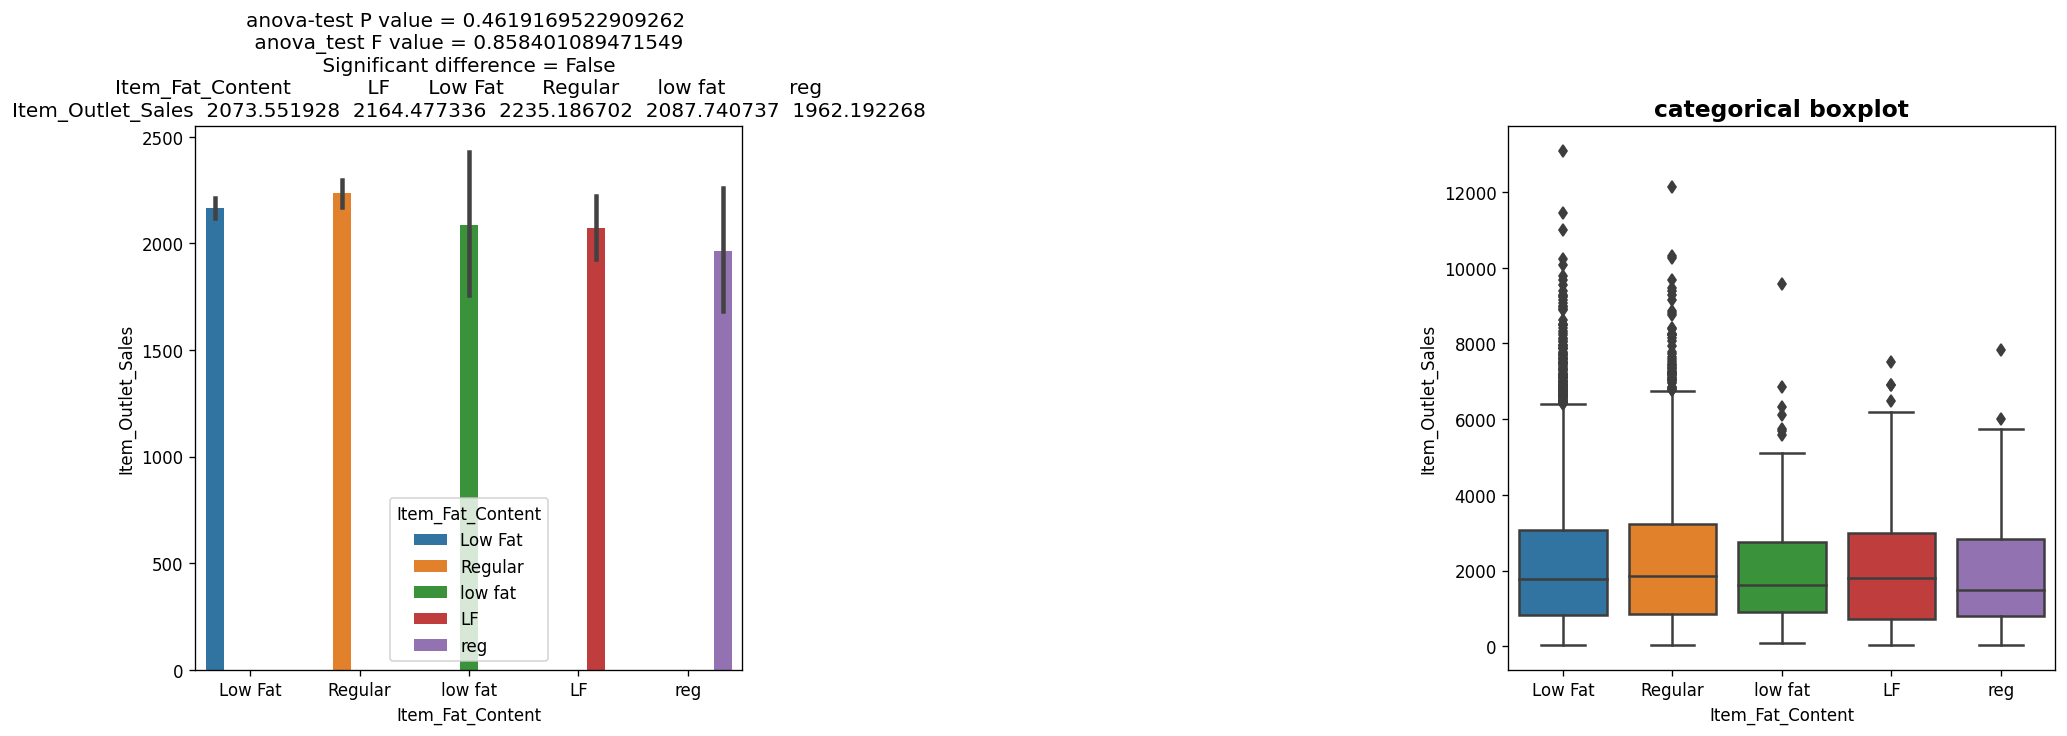

In [68]:
Bivariate_cont_cat(df_tr,'Item_Outlet_Sales','Item_Fat_Content',p_value,f_value, 0.01)

**Observation:**
- There is no significance difference with the Item Fat Content. 
- The Distribution of Item Fat Content is slightly right skew.

In [69]:
df_tr['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [70]:
df_anova = df_tr[['Item_Outlet_Sales','Item_Type']]
grouped_anova = df_anova.groupby(['Item_Type'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Dairy')['Item_Outlet_Sales'],grouped_anova.get_group('Soft Drinks')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Meat')['Item_Outlet_Sales'], grouped_anova.get_group('Fruits and Vegetables')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Baking Goods')['Item_Outlet_Sales'],grouped_anova.get_group('Frozen Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breakfast')['Item_Outlet_Sales'], grouped_anova.get_group('Health and Hygiene')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Hard Drinks')['Item_Outlet_Sales'], grouped_anova.get_group('Canned')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breads')['Item_Outlet_Sales'],grouped_anova.get_group('Starchy Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Others')['Item_Outlet_Sales'],grouped_anova.get_group('Seafood')['Item_Outlet_Sales'])
print(f_value, p_value)

2.5313222772815256 0.0017939203039080086


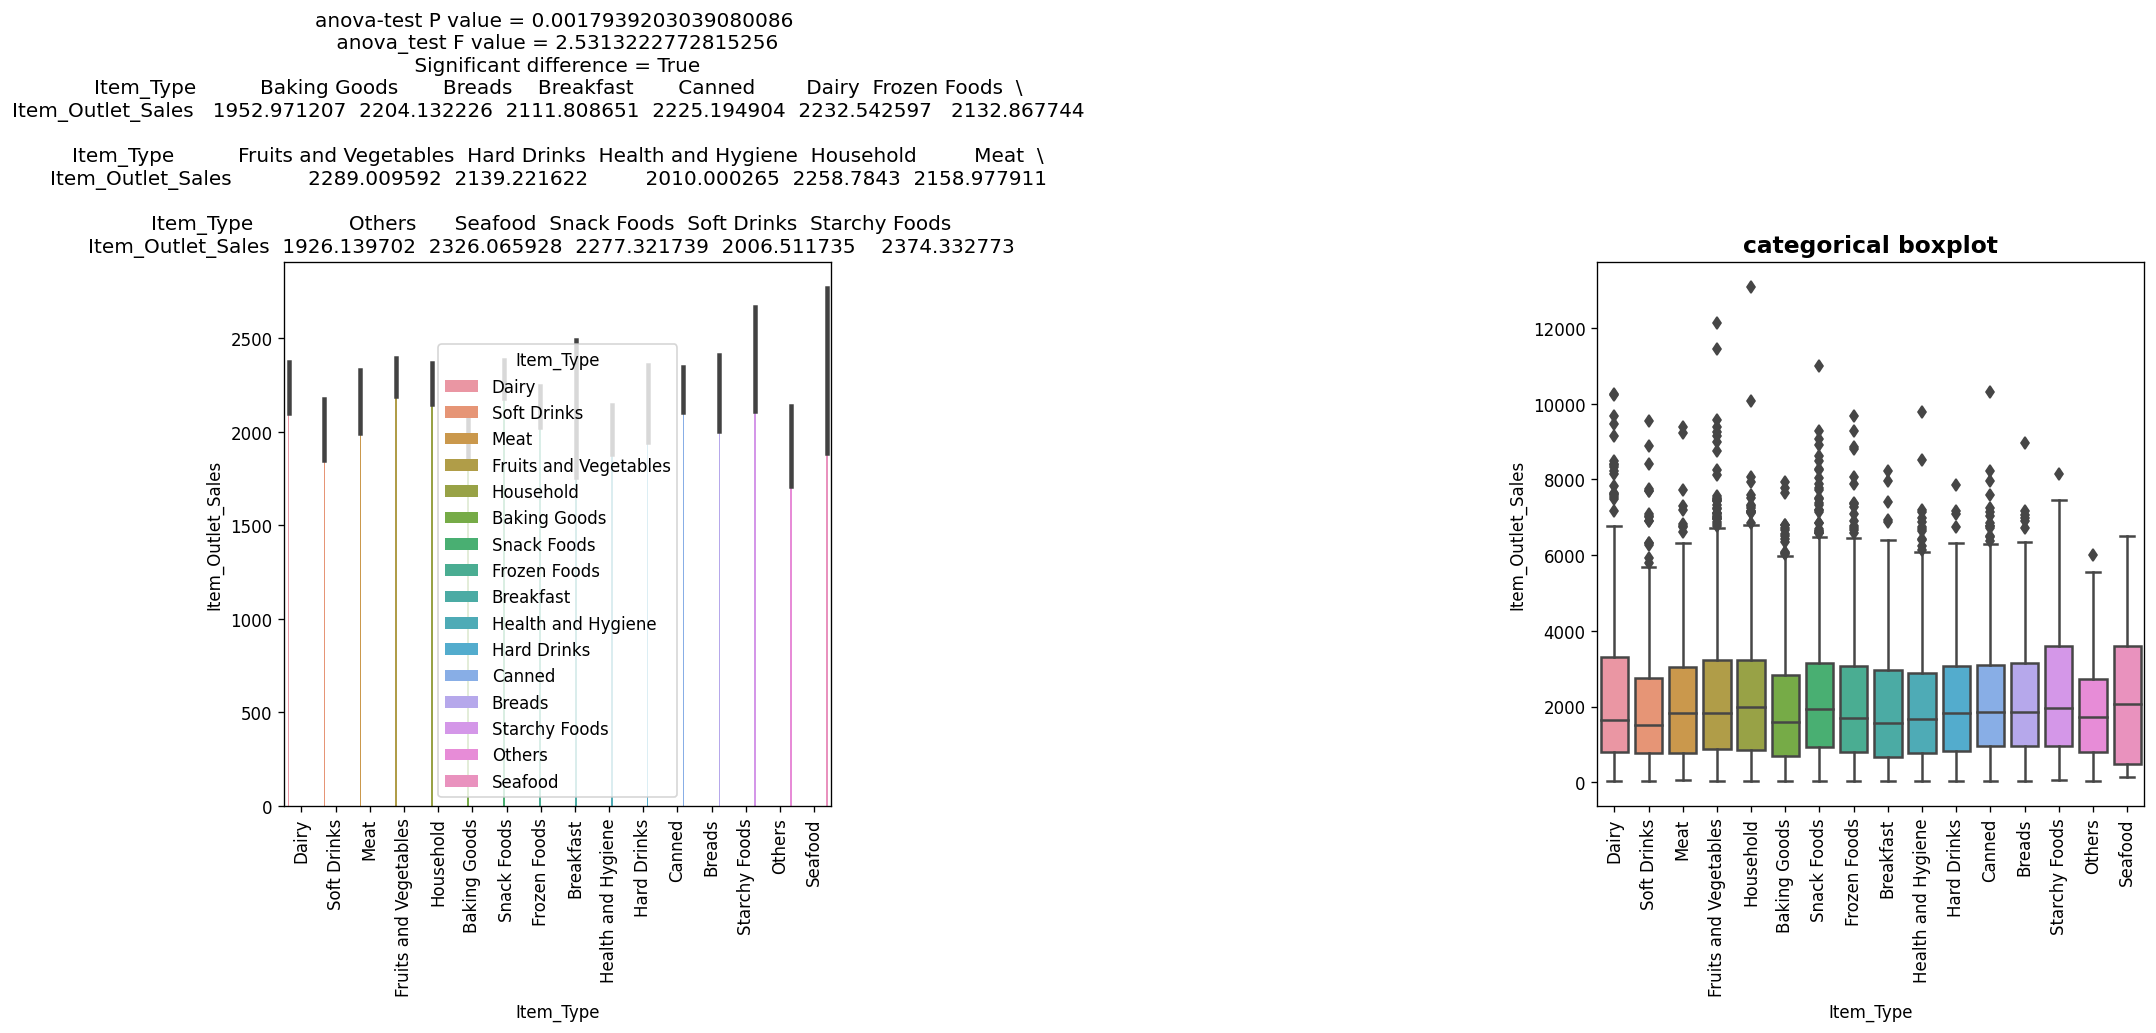

In [71]:
Bivariate_cont_cat(df_tr,'Item_Outlet_Sales','Item_Type',p_value,f_value, 0.01)

**Observation**
- There is a significance difference between Item sales of different item types.
- Dairy products have the higher Item Outlet sales than others.

#### Are the stores with medium size have high sale than others.

In [72]:
df_tr['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [73]:
df_anova = df_tr[['Item_Outlet_Sales','Outlet_Size']]
grouped_anova = df_anova.groupby(['Outlet_Size'])
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Medium')['Item_Outlet_Sales'],grouped_anova.get_group('High')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Small')['Item_Outlet_Sales'])
print(f_value,p_value)

93.36122536013815 7.792017369431698e-41


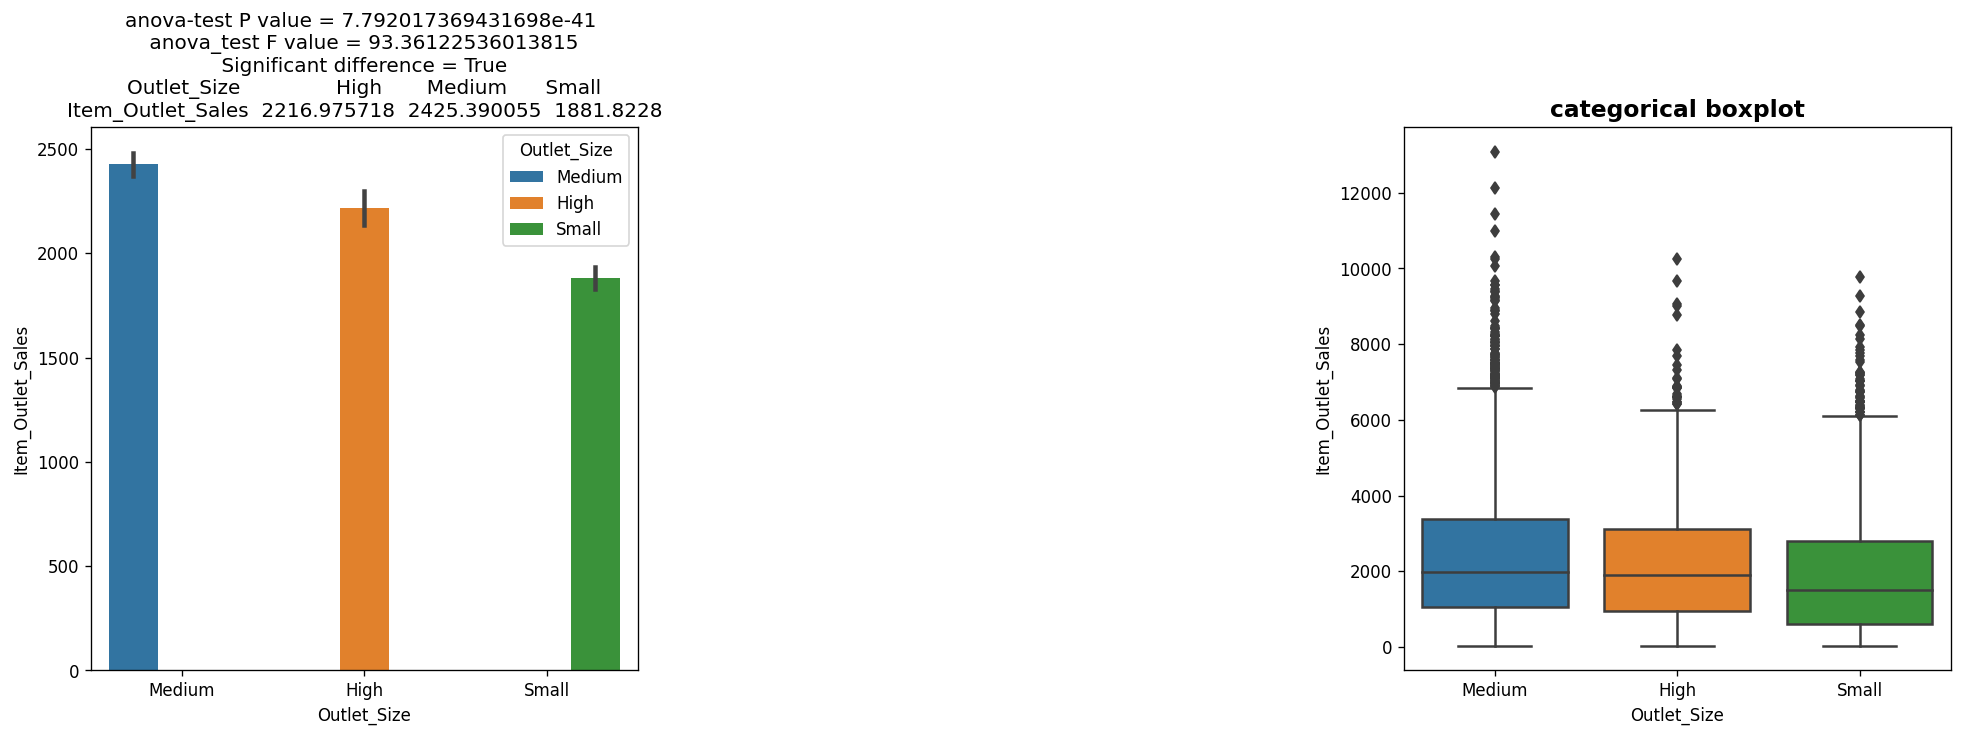

In [74]:
Bivariate_cont_cat(df_tr,'Item_Outlet_Sales','Outlet_Size',p_value, f_value, sign_level = 0.05)

**Observation:**
- Yes there is a significance difference between Item Outlet Sales of stores with different Outlet Size.
- Medium size stores have more Item Outlet sales than others, while the small size stores have the least Item Outlet sales.
- Mean Item Outlet sales of the 'Medium' Outlet size is above 2500 while that of 'High' is below 2500 and 'Small' is of below 2000.

- ### Are the stores located in Tier 3 cities have more sales than other.

In [76]:
df_tr['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [77]:
df_anova = df_tr[['Item_Outlet_Sales','Outlet_Location_Type']]
grouped_anova = df_anova.groupby('Outlet_Location_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Tier 1')['Item_Outlet_Sales'],grouped_anova.get_group('Tier 2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Tier 3')['Item_Outlet_Sales'])
print(f_value,p_value)

53.94773987456066 5.2228172988842975e-24


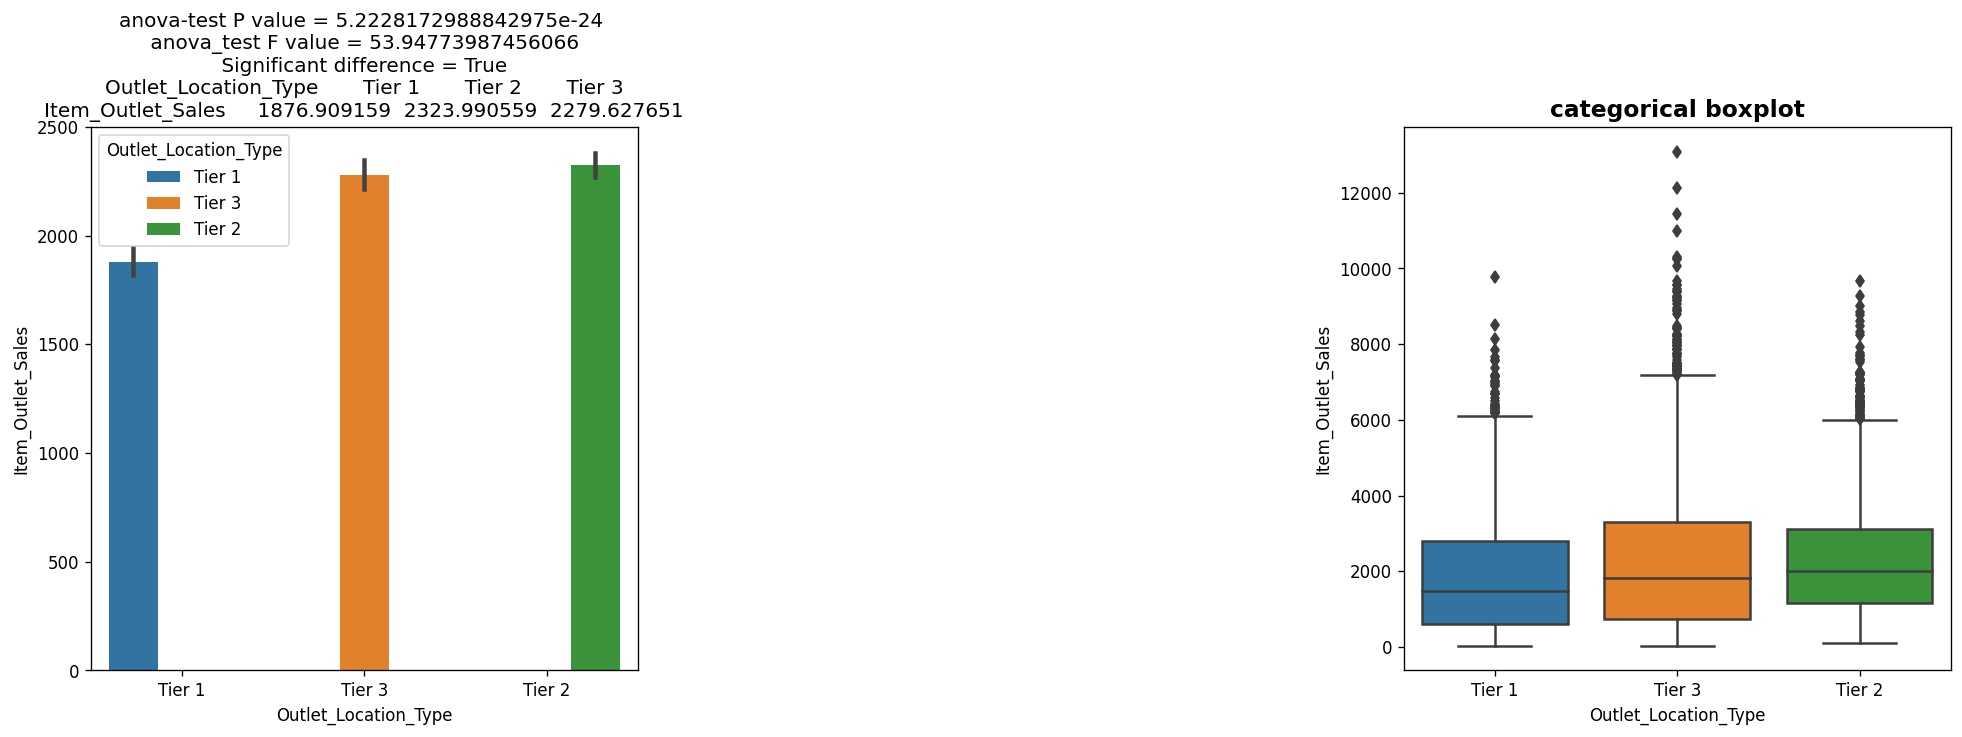

In [78]:
Bivariate_cont_cat(df_tr,'Item_Outlet_Sales','Outlet_Location_Type', p_value, f_value, sign_level = 0.05)

#### Observation:
- There is a significance difference between the Item Outlet Sales of stores of different Outlet Location Type.
- Tier 2 cities have most sales while Tier 1 cities least sales.
- The average sale of Tier 2 cities is 2324 while that of Tier 2279.


- ### Are the Supermarket Type 1 type of stores have more sales than other type of stores.

In [80]:
df_tr['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [81]:
df_anova = df_tr[['Item_Outlet_Sales','Outlet_Type']]
grouped_anova = df_anova.groupby('Outlet_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Supermarket Type1')['Item_Outlet_Sales'],grouped_anova.get_group('Supermarket Type2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Supermarket Type3')['Item_Outlet_Sales'])
print(f_value,p_value)

343.91819903375557 1.402711127727785e-143


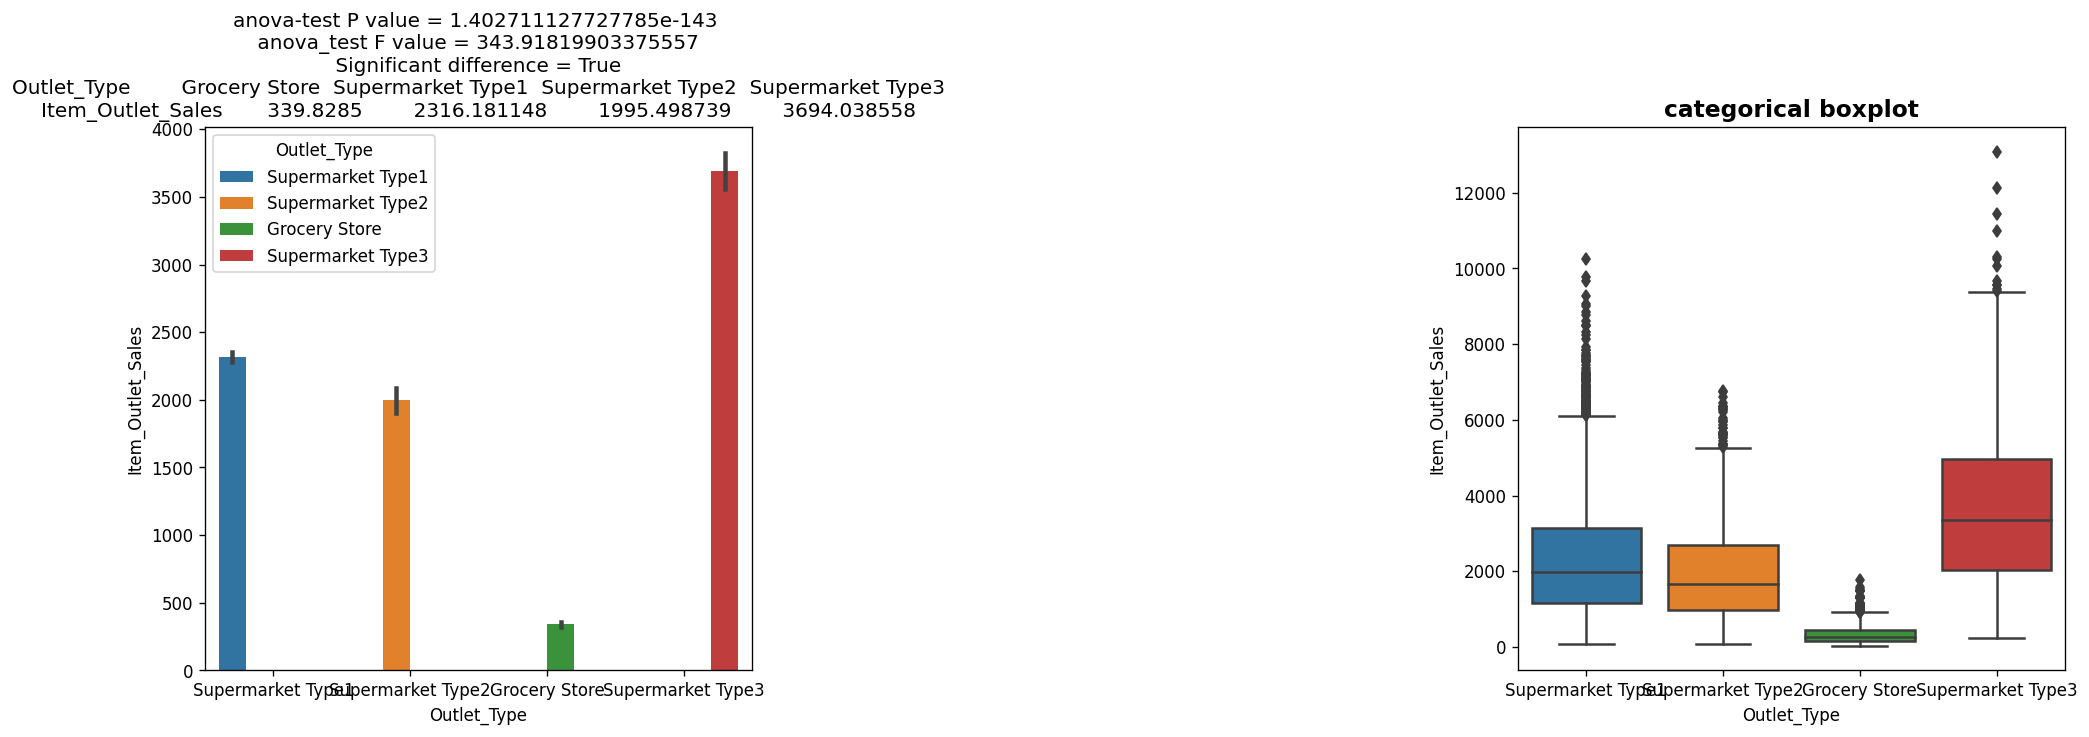

In [83]:
Bivariate_cont_cat(df_tr,'Item_Outlet_Sales','Outlet_Type', p_value,f_value, sign_level=0.05)

**Observation:**
- There is a significance difference between the Item Outlet Sales of stores of different Outlet Type.
- No the supermarket Type 1 does not have the more sales than others
- Supermarket type 3 have more sales than others and the average sales of the Supermarket Type 3 is 3694.
- Grocery store has the least Item Outlet sales.

- ### Are the different stores affect the Item Outlet Sales.

In [85]:
df_tr['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [86]:
df_anova = df_tr[['Item_Outlet_Sales','Outlet_Identifier']]
grouped_anova = df_anova.groupby('Outlet_Identifier')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('OUT049')['Item_Outlet_Sales'],grouped_anova.get_group('OUT018')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT010')['Item_Outlet_Sales'],grouped_anova.get_group('OUT013')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT027')['Item_Outlet_Sales'],grouped_anova.get_group('OUT045')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT017')['Item_Outlet_Sales'],grouped_anova.get_group('OUT046')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT019')['Item_Outlet_Sales'],grouped_anova.get_group('OUT035')['Item_Outlet_Sales'])
print(f_value,p_value)

300.07913532849034 0.0


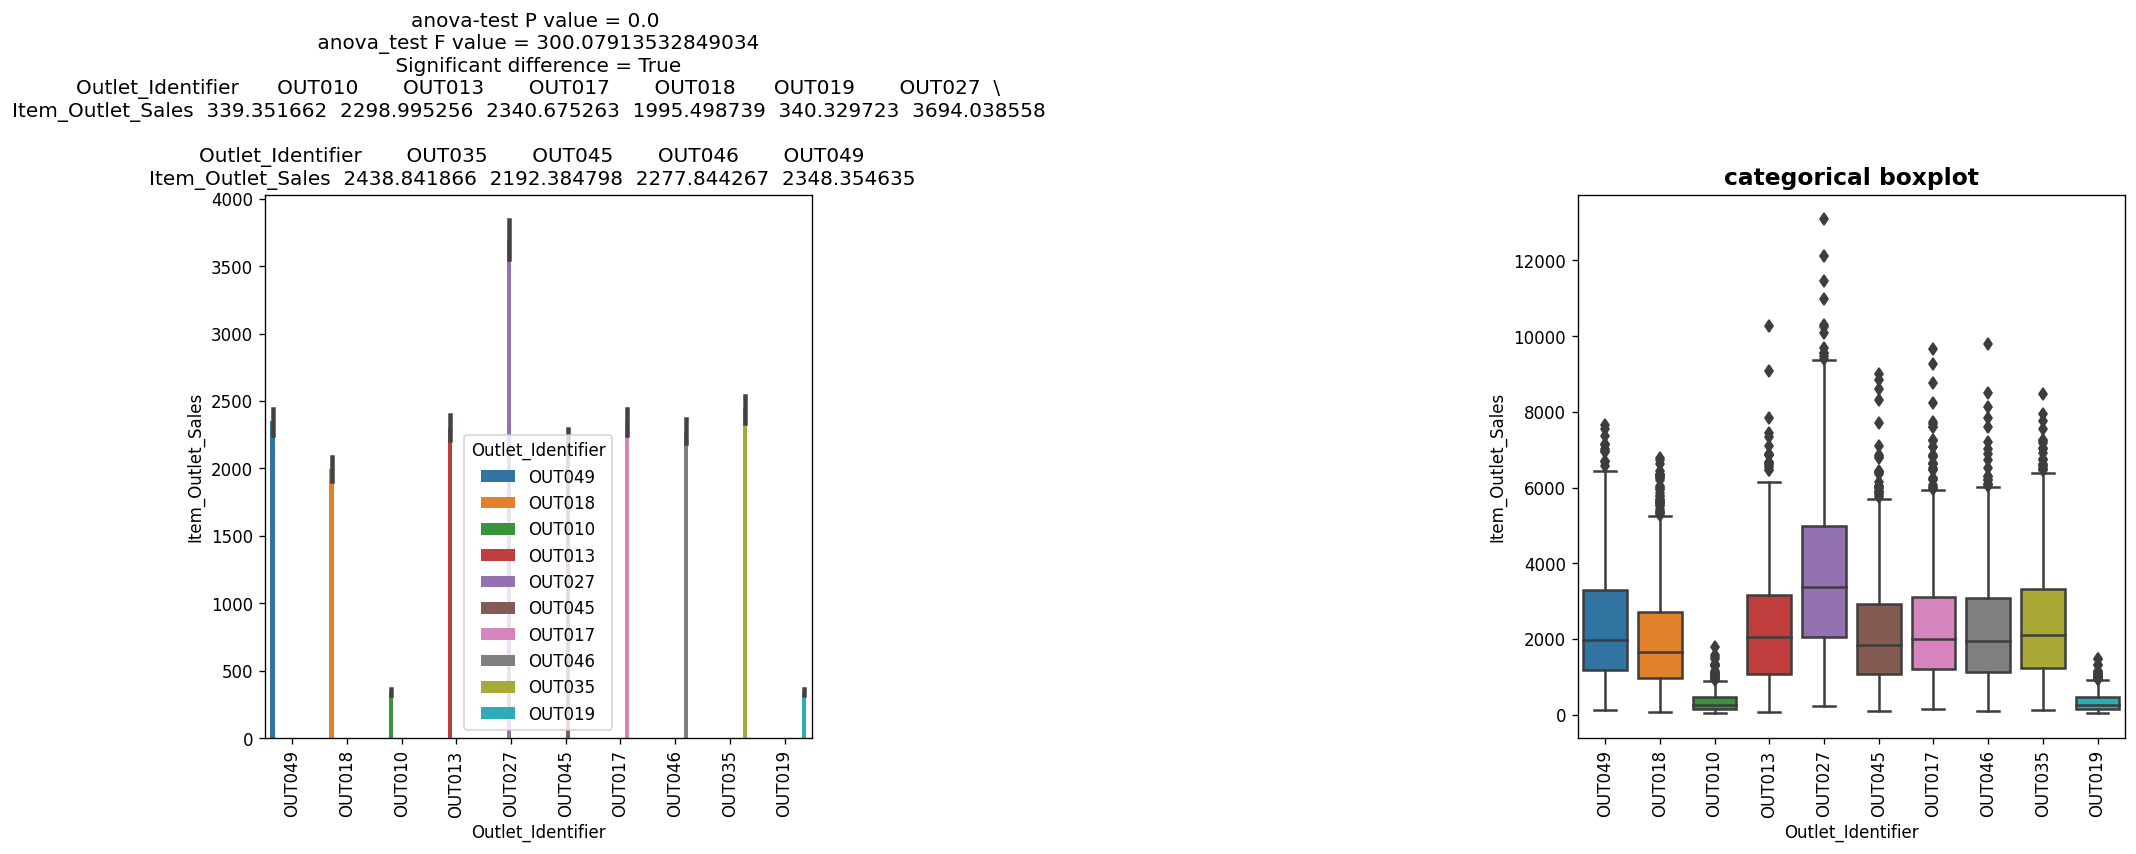

In [88]:
Bivariate_cont_cat(df_tr,'Item_Outlet_Sales','Outlet_Identifier',p_value,f_value,sign_level = 0.05)

**Observation:**
- There is a significance difference on the Item Outlet Sales of different stores based on store Id i.e Outlet Identifier.
- Sales of OUT049 comes from the items whose average sales lies between 200-1000.

### Categorical Variable Analysis:


### Two-way table: :
- We can start analysing the relationship by creating a two-way table of count and count%. 
- The rows represent the category of one variable and the columns represent the categories of the other variable.
- We show count or count% of observations available in each combination of row and column categories.
- Stacked Column Chart: This method is more of a visual form of a Two-way table.

In [91]:
categorical = df_tr.select_dtypes(include=object).columns
categorical

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [127]:
clarity_color_table = pd.crosstab(index=df_tr['Outlet_Location_Type'], 
                          columns=df_tr['Outlet_Size'])

clarity_color_table       

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,290,846,1649
Tier 3,1010,2118,222


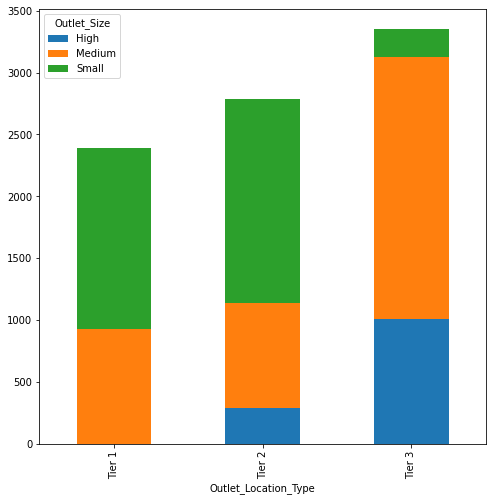

In [128]:
clarity_color_table.plot(kind="bar", figsize=(8,8), stacked=True)

**Observation:**
- Tier 1 has only two type Outlet_size No High size Outlet.
- Comparing Tier 2 & Tier 3, Tier 2 has more quantiy Samll size Outlet and Tier 3 has more quantity of Medium size Outlet

In [129]:
clarity_color_table = pd.crosstab(index=df_tr['Outlet_Location_Type'], 
                          columns=df_tr['Outlet_Identifier'])

clarity_color_table       

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Location_Type,,,,,,,,,,
Tier 1,0,0,0,0,528,0,0,0,930,930
Tier 2,0,0,926,0,0,0,930,929,0,0
Tier 3,555,932,0,928,0,935,0,0,0,0


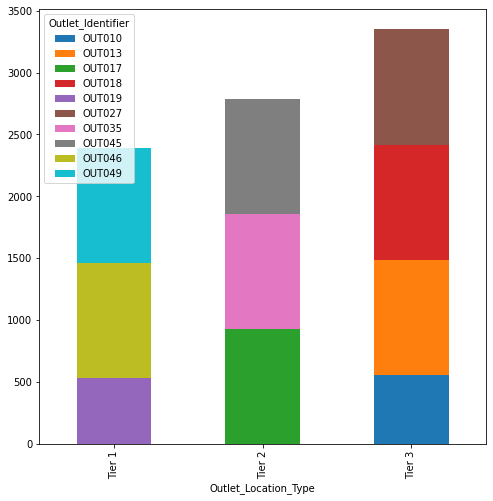

In [130]:
clarity_color_table.plot(kind="bar", figsize=(8,8), stacked=True)

Observation:
- There hardly any correlation or Outlet Location Type and Outlet size

In [121]:
clarity_color_table = pd.crosstab(index=df_tr['Item_Fat_Content'], 
                          columns=df_tr['Outlet_Size'])

clarity_color_table       

Outlet_Size,High,Medium,Small
Item_Fat_Content,,,
LF,46,148,122
Low Fat,763,2339,1987
Regular,453,1304,1132
low fat,22,47,43
reg,16,56,45


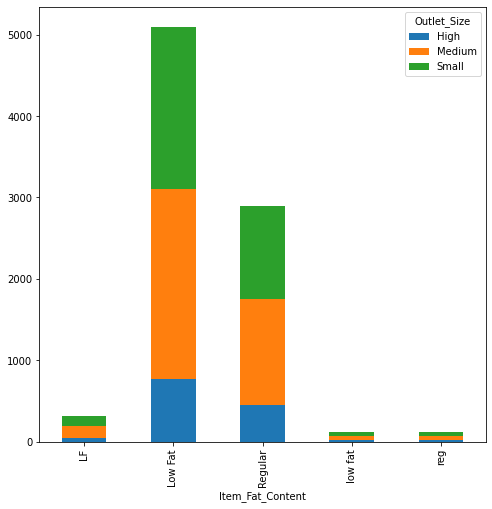

In [122]:
clarity_color_table.plot(kind="bar", figsize=(8,8), stacked=True, )

**Observation:**
- In all attribute of Iten_Fat_Content, Medium size out_let item are more in quantity.

In [131]:
clarity_color_table = pd.crosstab(index=df_tr['Outlet_Location_Type'], 
                          columns=df_tr['Outlet_Type'])

clarity_color_table       

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


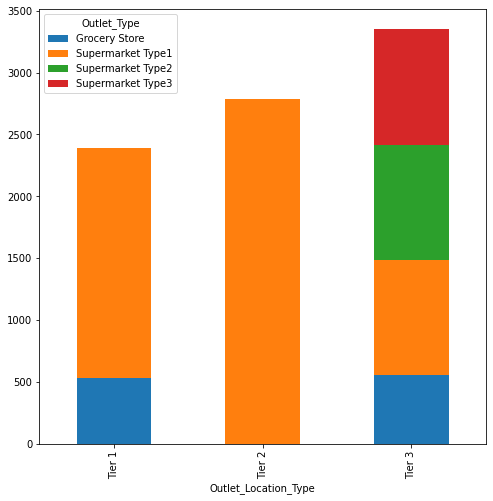

In [132]:
clarity_color_table.plot(kind="bar", figsize=(8,8), stacked=True, )

**Observation:**
- Tier 2 City has only Supermarket Type1 Store.
- Tier 1 and more Outlet_Type of Supermarket Type1.
- Tier 3 has all type of Outlet_Type Store.

In [134]:
clarity_color_table = pd.crosstab(index=df_tr['Outlet_Type'], 
                          columns=df_tr['Outlet_Size'])

clarity_color_table       

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,78,255,750
Supermarket Type1,1222,1776,2579
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


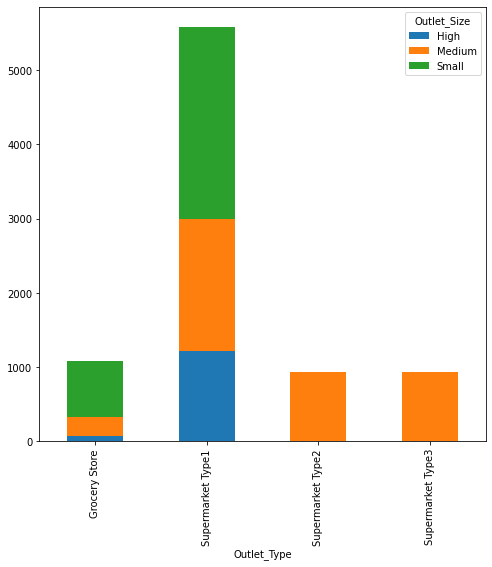

In [135]:
clarity_color_table.plot(kind="bar", figsize=(8,8), stacked=True, )

**Observation:**
- Supermarket Type2 and Supermarket Type3 has only Medium Size Outlet.
- In Glosery Store and Supermarket Type3 has more mumber of Small size Outlet.

### Categorical Hypothesis Test:
- **Using p-value:** We define a significance factor to determine whether the relation between the variables is of considerable significance. Generally a significance factor or alpha value of 0.05 is chosen
- Using chi-square value: If our calculated value of chi-square is less or equal to the tabular(also called critical) value of chi-square, then H0 holds true.

- ### Dose the Content level of Fat affect the Outlet Size

In [145]:
clarity_color_table = pd.crosstab(index=df_tr['Item_Fat_Content'], 
                          columns=df_tr['Outlet_Size'])

clarity_color_table       

Outlet_Size,High,Medium,Small
Item_Fat_Content,,,
LF,46,148,122
Low Fat,763,2339,1987
Regular,453,1304,1132
low fat,22,47,43
reg,16,56,45


In [146]:
from scipy.stats import chi2_contingency 

stat, p, dof, expected = chi2_contingency(clarity_color_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

p value is 0.9241407358512147
Independent (H0 holds true)


**Observation :**
- Comparing above all categorical feature, only the above two feature has no relationship with each other.
- This shows that level of the Fat content dose not affect the Outlet Size.

#### Does Location Type affect the Outlet Size.

In [151]:
clarity_color_table_1 = pd.crosstab(index=df_tr['Outlet_Location_Type'], 
                          columns=df_tr['Outlet_Size'])

clarity_color_table_1     

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,290,846,1649
Tier 3,1010,2118,222


In [152]:
from scipy.stats import chi2_contingency 

stat, p, dof, expected = chi2_contingency(clarity_color_table_1)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


**Observation:**
- This shows that their is some what relation between the *Outlet_Location_Type* and Outlet_Size.
- Choosing the Location can affect the Sale of *Outlet_Size*.